In [1]:
import pandas as pd
import mplcyberpunk
import matplotlib.pyplot as plt
plt.style.use('cyberpunk')

In [2]:
df = pd.read_csv('myskyatnight.csv')

/home/admin2/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (13,14,15,16,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,obs_type,obs_id,gan_id,nelm,nelm_uncertainty,sqm_value,lat,lon,date_utc,time_utc,...,constellation,sky_comment,location_comment,country,sequence_number,star_id,magnitude,found,reason,night_mode
0,GAN,8718,125699.0,1.0,NaN,NaN,-35.442,-71.690,2014-03-24,02:16:00,...,Orion,el cielo esta despejado se ve lo comun ni tant...,zona rural los postes estn todos prendidos,Chile,NaN,NaN,NaN,NaN,NaN,NaN
1,GAN,8717,125698.0,4.0,NaN,NaN,44.959,26.005,2014-03-28,19:50:00,...,Orion,NaN,"urban, Nalbei street, no 2, trees",Romania,NaN,NaN,NaN,NaN,NaN,NaN
2,GAN,8715,125696.0,4.0,NaN,NaN,44.959,26.005,2014-03-27,19:30:00,...,Orion,NaN,"urban, Nalbei street, no 2, trees",Romania,NaN,NaN,NaN,NaN,NaN,NaN
3,GAN,8714,125694.0,4.0,NaN,NaN,44.959,26.005,2014-03-27,19:00:00,...,Orion,NaN,"urban, Nalbei street, no 2, trees",Romania,NaN,NaN,NaN,NaN,NaN,NaN
4,GAN,8710,125690.0,4.0,NaN,NaN,54.092,18.777,2014-03-29,20:08:00,...,Orion,NaN,NaN,Poland,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
lat = df['lat']

In [5]:
lon = df['lon']

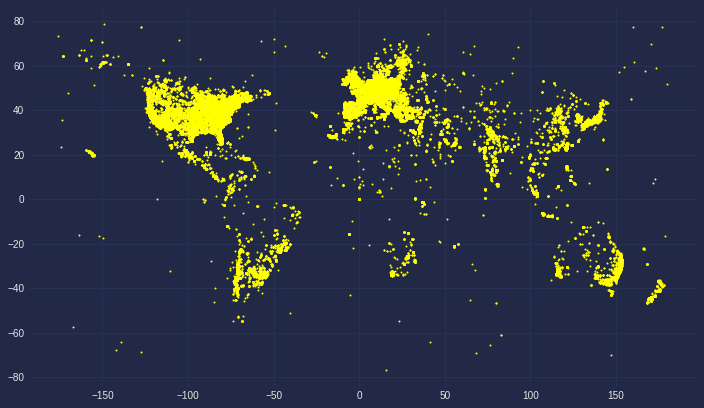

In [6]:
plt.figure(figsize=(12,7))
plt.scatter(x = lon, y = lat,color = 'yellow',s = 1)
plt.show()

In [7]:
from sklearn.cluster import KMeans

In [8]:
x = df.iloc[:,[6,7]].values

In [9]:
x

array([[-35.442, -71.69 ],
       [ 44.959,  26.005],
       [ 44.959,  26.005],
       ...,
       [-21.274,  55.587],
       [-21.136,  55.472],
       [ 40.188, -75.483]])

In [10]:
error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    error.append(kmeans.inertia_)

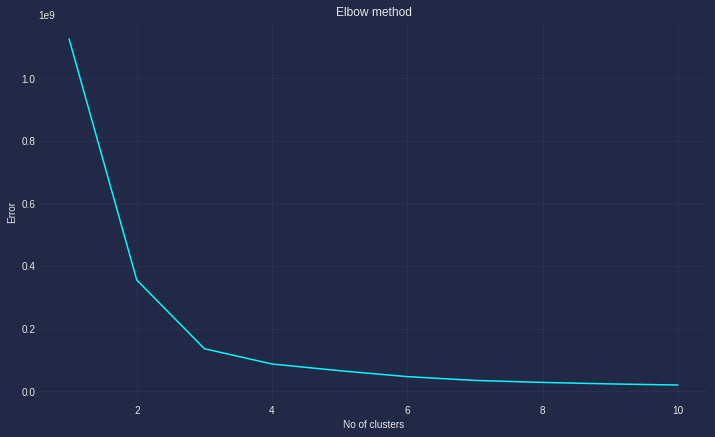

In [11]:
plt.figure(figsize=(12,7))
plt.plot(range(1, 11), error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [13]:
kmeans = KMeans(n_clusters = 6)

In [14]:
y1 = kmeans.fit_predict(x)

In [15]:
y1

array([5, 2, 2, ..., 4, 4, 1], dtype=int32)

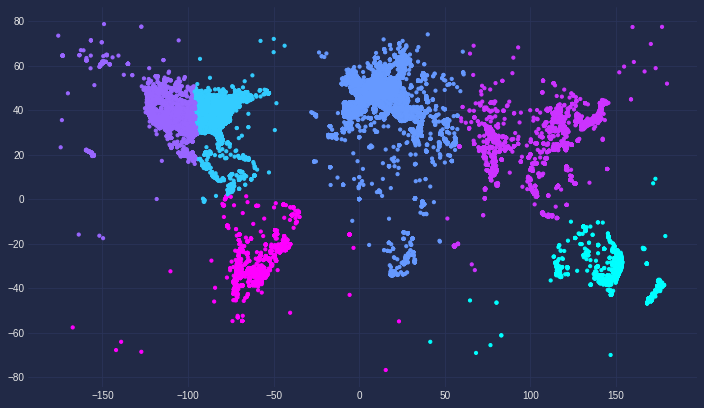

In [16]:
plt.figure(figsize=(12,7))
plt.scatter(x[:,1],x[:,0],c=y1,s = 10)
plt.show()

In [17]:
kmeans = KMeans(n_clusters = 3)

In [18]:
y2 = kmeans.fit_predict(x)

## 

In [19]:
y2

array([0, 1, 1, ..., 2, 2, 0], dtype=int32)

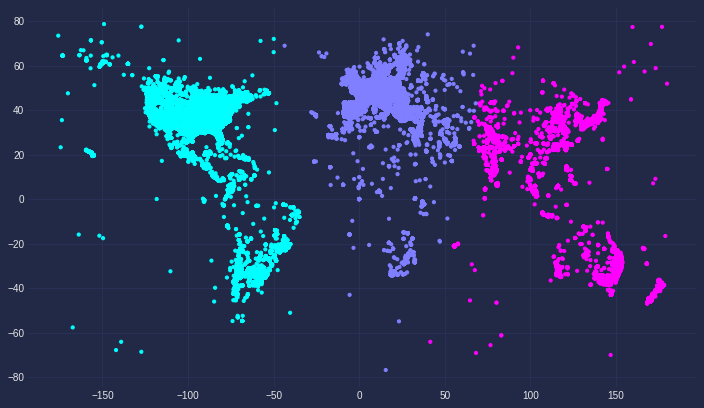

In [20]:
plt.figure(figsize=(12,7))
plt.scatter(x[:,1],x[:,0],c=y2,s = 10)
plt.show()

In [37]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=1. , min_samples= 7)